In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

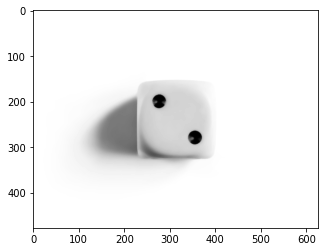

In [7]:
original_img = cv2.imread('input/0.jpg')
gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
gray_img = cv2.medianBlur(gray_img, 7)

plt.imshow(gray_img, cmap='gray')

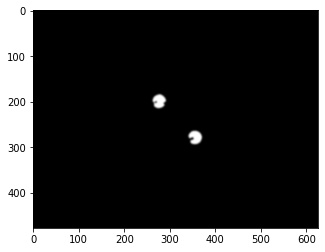

In [8]:
_, thresh = cv2.threshold(gray_img, 80, 255, cv2.THRESH_BINARY)
thresh = 255 - thresh
thresh = cv2.GaussianBlur(thresh, (9, 9), 0)
plt.imshow(thresh, cmap='gray')

In [9]:
contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(len(contours))

2


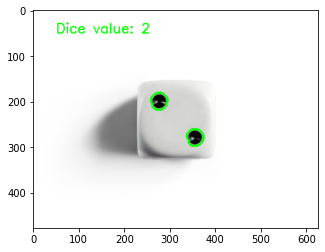

In [10]:
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    cv2.drawContours(original_img, c, -1, (0, 255, 0), 4)
cv2.putText(original_img, f'Dice value: {len(contours)}', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
plt.imshow(original_img)